Iteration 1: shortest path = 425.91
Iteration 2: shortest path = 406.64
Iteration 3: shortest path = 372.28
Iteration 4: shortest path = 396.84
Iteration 5: shortest path = 372.00
Iteration 6: shortest path = 400.43
Iteration 7: shortest path = 410.77
Iteration 8: shortest path = 384.68
Iteration 9: shortest path = 405.21
Iteration 10: shortest path = 379.88
Iteration 11: shortest path = 404.91
Iteration 12: shortest path = 390.06
Iteration 13: shortest path = 378.45
Iteration 14: shortest path = 379.61
Iteration 15: shortest path = 396.18
Iteration 16: shortest path = 358.26
Iteration 17: shortest path = 397.74
Iteration 18: shortest path = 384.24
Iteration 19: shortest path = 397.76
Iteration 20: shortest path = 399.64
Iteration 21: shortest path = 384.09
Iteration 22: shortest path = 387.78
Iteration 23: shortest path = 366.27
Iteration 24: shortest path = 359.75
Iteration 25: shortest path = 364.29
Iteration 26: shortest path = 360.76
Iteration 27: shortest path = 381.94
Iteration 

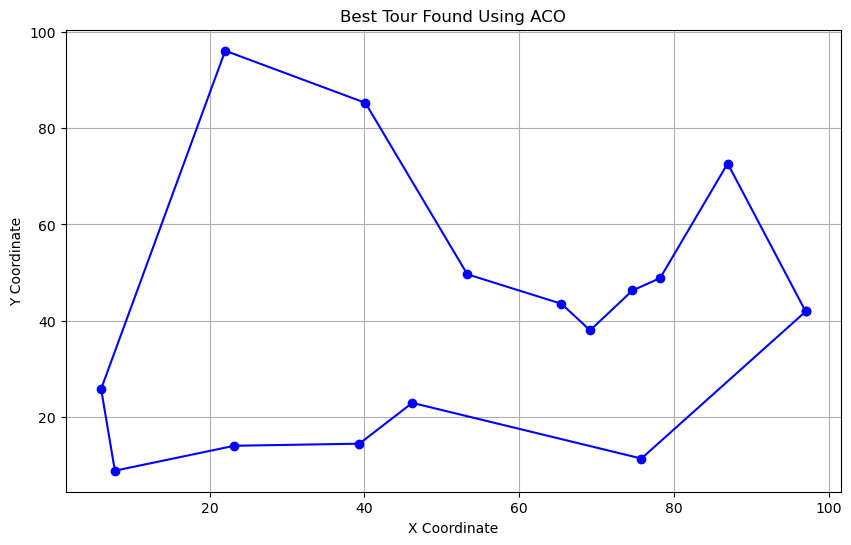

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Distance Matrix
# ----------------------------
def generate_cities(n, width=100, height=100):
    return np.random.rand(n, 2) * [width, height]

def distance_matrix(cities):
    n = len(cities)
    dist = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dist[i][j] = np.linalg.norm(cities[i] - cities[j])
    return dist

# ----------------------------
# Ant Colony Optimization
# ----------------------------
class AntColony:
    def __init__(self, dist_matrix, n_ants, n_best, n_iterations, decay, alpha=1, beta=2):
        self.dist_matrix = dist_matrix
        self.pheromone = np.ones(self.dist_matrix.shape) / len(dist_matrix)
        self.all_inds = range(len(dist_matrix))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha  # pheromone importance
        self.beta = beta    # distance importance

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)

        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheromone(all_paths, self.n_best)
            shortest_path = min(all_paths, key=lambda x: x[1])
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path
            self.pheromone *= self.decay
            print(f"Iteration {i+1}: shortest path = {shortest_path[1]:.2f}")
        return all_time_shortest_path

    def gen_path_dist(self, path):
        total = 0
        for i in range(len(path)):
            total += self.dist_matrix[path[i % len(path)]][path[(i + 1) % len(path)]]
        return total

    def gen_all_paths(self):
        all_paths = []
        for _ in range(self.n_ants):
            path = self.gen_path(0)  # start at city 0
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        path.append(start)

        prev = start
        for _ in range(len(self.dist_matrix) - 1):
            move = self.pick_next(prev, visited)
            path.append(move)
            visited.add(move)
            prev = move
        return path

    def pick_next(self, current, visited):
        pheromone = np.copy(self.pheromone[current])
        pheromone[list(visited)] = 0

        distances = self.dist_matrix[current]
        heuristic = 1 / (distances + 1e-10)  # avoid division by zero

        prob = pheromone ** self.alpha * heuristic ** self.beta
        prob /= prob.sum()

        return np.random.choice(self.all_inds, 1, p=prob)[0]

    def spread_pheromone(self, all_paths, n_best):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for i in range(len(path)):
                from_city = path[i % len(path)]
                to_city = path[(i + 1) % len(path)]
                self.pheromone[from_city][to_city] += 1.0 / dist
                self.pheromone[to_city][from_city] += 1.0 / dist

# ----------------------------
# Main
# ----------------------------
if __name__ == "__main__":
    NUM_CITIES = 15
    cities = generate_cities(NUM_CITIES)
    dist_matrix = distance_matrix(cities)

    colony = AntColony(dist_matrix, n_ants=30, n_best=5, n_iterations=100, decay=0.95, alpha=1, beta=2)
    best_path, best_distance = colony.run()

    print(f"\nBest tour: {best_path}")
    print(f"Tour length: {best_distance:.2f}")

    # Plotting
    tour_cities = np.array([cities[i] for i in best_path] + [cities[best_path[0]]])
    plt.figure(figsize=(10, 6))
    plt.plot(tour_cities[:, 0], tour_cities[:, 1], 'o-', color='blue')
    plt.title("Best Tour Found Using ACO")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.show()
